# Investigación de películas en Netflix

![Imagen](https://www.mactrast.com/wp-content/uploads/2018/07/netflix-logo-banner.jpg)

## Cargando los datos a un diccionario

In [3]:
#Creando listas de los años, y media de duracion de peliculas por año

anos = [2011,2012,2013,2014,2015,2016,2017,2018,2019,2020]
duracion = [103, 101, 99, 100, 100, 95, 95, 96, 93, 90]

#Creando un diccionario con las dos listas.

pel_dict = {'anos': anos, 'duracion': duracion}

#Imprimiendo el diccionario

print(pel_dict)

{'anos': [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020], 'duracion': [103, 101, 99, 100, 100, 95, 95, 96, 93, 90]}


## Creando marco de datos desde un diccionario

In [4]:
#Importamos la libreria pandas
import pandas as pd

#Creando un marco de datos desde un diccionario
duracion_df = pd.DataFrame(pel_dict)

#Imprimiendo el marco de datos
print(duracion_df)

   anos  duracion
0  2011       103
1  2012       101
2  2013        99
3  2014       100
4  2015       100
5  2016        95
6  2017        95
7  2018        96
8  2019        93
9  2020        90


## Visualizar los datos

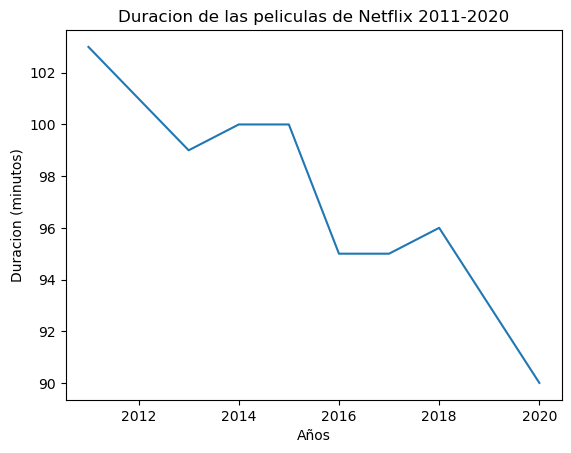

In [5]:
#Importando la libreria matplotlib para visualizar los datos
import matplotlib.pyplot as plt

#Grafico de linea para representar los años de duracion y año de lanzamiento
plt.plot(anos,duracion)

#Creando un titlo para el grafico
plt.title("Duracion de las peliculas de Netflix 2011-2020")

#Colocandole etiquetas a los ejes
plt.xlabel("Años")
plt.ylabel('Duracion (minutos)')

#Mostrar el grafico
plt.show()

#### Se puede apreciar en el grafico que la tendecia es bajista. Lo que indica que las peliculas han drececido en el tiempo de duracion durante los ultimos años. Surgen interrogantes. ¿Es esto explicable por algo como el género de entretenimiento?.¿Cómo se ve esta tendencia durante un período de tiempo más largo?
#### Cargaremos un dataset (.csv) con los datos completos obtenidos en Kaggle, para obtener mayor informacion sobre esto



## Cargando el resto de los datos desde un .csv (Excel) 

In [11]:
#Leer el archivo .csv como un marco de datos
netflix_df = pd.read_csv("datos_netflix.csv") 

#Imprimir las primeras seis filas del marco de datos para verificacion
netflix_df[0:6]



,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,4,In a future where the elite inhabit an island ...,International TV
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,1,A genetics professor experiments with a treatm...,International TV


#### Podemos observar que hay columnas que no necesitamos, vamos a filtrarlas creando un nuevo marco de datos. Con las columnas de tittle, country, genre, release_year y duration

## Filtrado para peliculas

In [18]:
# Creando un subconjunto de solamente peliculas
netflix_df_solo_peliculas = netflix_df[netflix_df['type'] == 'Movie'] 
                                                
# Seleccionando solamente las columnas de interes
netflix_movies_col_subset = netflix_df_solo_peliculas[['title', 'country', 'genre', 'release_year', 'duration']]
                                                  
# Imprimiento las primeras seis filas para verificacion
netflix_movies_col_subset[0:5]

,title,country,genre,release_year,duration
1,7:19,Mexico,Dramas,2016,93
2,23:59,Singapore,Horror Movies,2011,78
3,9,United States,Action,2009,80
4,21,United States,Dramas,2008,123
6,122,Egypt,Horror Movies,2019,95


#### Ahora, que estaremos trabajando con datos indidivuales. Ya un grafico lineal no es muy recomendable. Para este caso utilizare un grafico de dispersion

## Creando un Diagrama de Dispersion

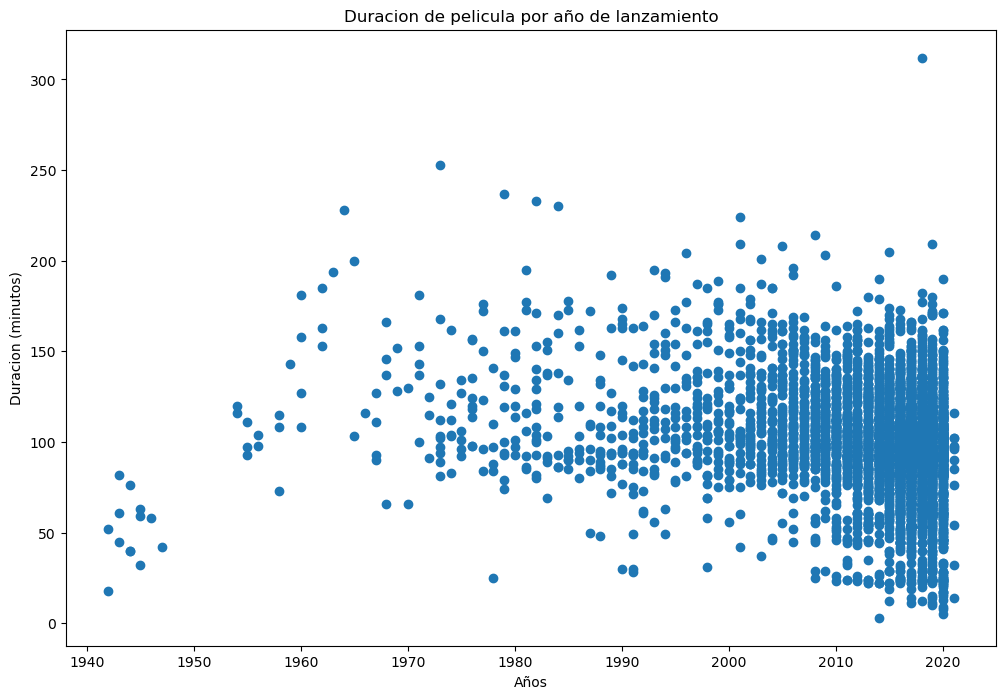

In [22]:
#Creando una figura, para aumentar el tamaño el grafico y asi apreciar mejor los resultados
fig = plt.figure(figsize=(12,8))

#Creando el diagrama de dispersion Duracion vs año
plt.scatter(netflix_movies_col_subset["release_year"], netflix_movies_col_subset["duration"])

#Creando un titulo para el grafico 
plt.title('Duracion de pelicula por año de lanzamiento')

#Creando etiquetas para los ejes
plt.xlabel("Años")
plt.ylabel('Duracion (minutos)')

#Mostrar el grafico
plt.show()

#### Podemos observar que algunas de estas peliculas, duran menos de 60 minutos. Algo puede ocurrir que este alterando la media. Crearemos otro marco de datos para peliculas con duracion menor a 60 minutos y ver lo que ocurre

## Profundizar en los datos

In [24]:
#Filtrar peliculas que duren menos a 60 minutos
peliculas_cortas = netflix_movies_col_subset[netflix_movies_col_subset['duration'] < 60]

#Imprimir el marco de datos las primeras 20 filas
peliculas_cortas[0:20]


,title,country,genre,release_year,duration
35,#Rucker50,United States,Documentaries,2016,56
55,100 Things to do Before High School,United States,Uncategorized,2014,44
67,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,Uncategorized,2017,37
101,3 Seconds Divorce,Canada,Documentaries,2018,53
146,A 3 Minute Hug,Mexico,Documentaries,2019,28
162,A Christmas Special: Miraculous: Tales of Lady...,France,Uncategorized,2016,22
171,A Family Reunion Christmas,United States,Uncategorized,2019,29
177,A Go! Go! Cory Carson Christmas,United States,Children,2020,22
178,A Go! Go! Cory Carson Halloween,NaN,Children,2020,22
179,A Go! Go! Cory Carson Summer Camp,NaN,Children,2020,21


#### Observamos que muchas de estas peliculas, que duran menos que 60 minutos, son Stand-Up Documentales, para niños. Un resultado coherente, ya que estas peliculas suelen tener menor duracion. Se puede realizar otro grafico de dispersion con otros colores para los puntos con generos (Stand-UP, Documentales y Niños)

## Marcando peliculas que no son Largometrajes

In [34]:
#Definimos una lista vacia
colores = []

#Iteramos cada fila del marco de datos
for lab, row in netflix_movies_col_subset.iterrows():
    if row['genre'] == "Children":
        colores.append("red")
    elif row['genre'] == "Documentaries":
        colores.append("blue")
    elif row['genre'] == "Stand-Up":
        colores.append("green")
    else:
        colores.append("black")
        
#Inspeccionamos las primeras 10 peliculas 
colores[0:10]


['black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'blue']

## Graficando con Color

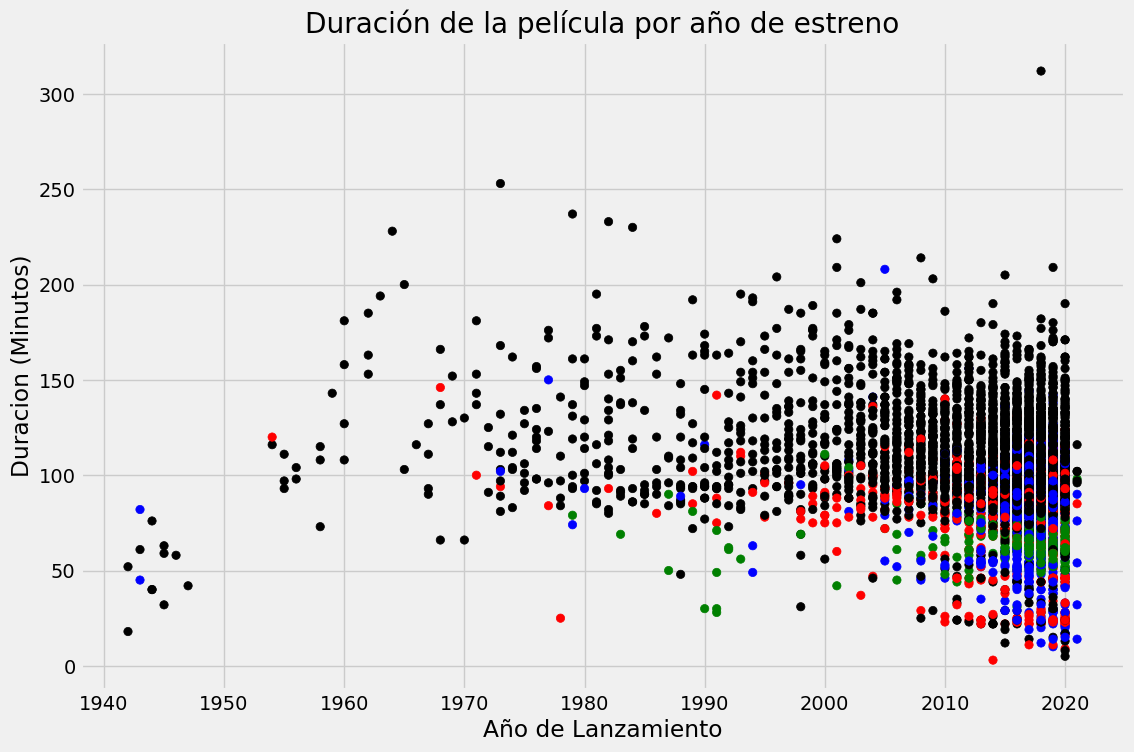

In [36]:
#Inicializar un nuevo grafico y figura.
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(12,8))

#Creando Grafico
plt.scatter(netflix_movies_col_subset["release_year"], netflix_movies_col_subset["duration"], c = colores)

# Creando etiquetas de ejes
plt.title("Duración de la película por año de estreno")
plt.xlabel("Año de Lanzamiento")
plt.ylabel("Duracion (Minutos)")

#Mostrar Grafico
plt.show()


### Los géneros atípicos, como las películas para niños y los documentales, se agrupan alrededor de la mitad inferior